In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# gaussian in xy plane
def gaussian(x, y, x0, y0, sigma):
    return np.exp(-((x-x0)**2 + (y-y0)**2) / (2*sigma**2))

In [92]:
# fourier transform returns the amplitude and phase
def fourier_transform(f):
    F = np.fft.fft2(f)
    F = np.fft.fftshift(F)
    F_amp = np.abs(F)
    F_phase = np.arctan(np.imag(F)/np.real(F))
    return F_amp, F_phase

In [ ]:
# plot next to each other amplitude of function, amplitude of fourier transform and phase of fourier transform
def plot(f, F, X, Y):
    fig, axs = plt.subplots(1, 3, figsize=(17, 5))

    lw = 0.2

    x_max = X.max()
    x_min = X.min()
    y_max = Y.max()
    y_min = Y.min()

    kx_max = np.pi / (x_max-x_min) * X.shape[0]
    kx_min = -kx_max
    ky_max = np.pi / (y_max-y_min) * Y.shape[0]
    ky_min = -ky_max

    kx = np.linspace(kx_min, kx_max, X.shape[0])
    ky = np.linspace(ky_min, ky_max, Y.shape[0])
    KX, KY = np.meshgrid(kx, ky)

    axs[0].contourf(X, Y, f, 100, cmap='hot')
    axs[0].set_title('f(x,y)')
    axs[0].set_xlabel(r'$x (\mathrm{\AA})$', fontsize=11)
    axs[0].set_ylabel(r'$y (\mathrm{\AA})$', fontsize=11)
    # add a colorbar
    fig.colorbar(axs[0].imshow(f, extent=(X.min(), X.max(), Y.min(), Y.max())))
    # white lines for x and y axis
    axs[0].axhline(0, color='white', lw=lw)
    axs[0].axvline(0, color='white', lw=lw)

    axs[1].imshow(F[0], extent=(kx_min, kx_max, ky_min, ky_max))
    axs[1].set_title('FFT(f) - amplitude')
    axs[1].set_xlabel(r'$k_x (\mathrm{\AA}^{-1})$', fontsize=11)
    axs[1].set_ylabel(r'$k_y (\mathrm{\AA}^{-1})$', fontsize=11)
    # add a colorbar
    fig.colorbar(axs[1].imshow(F[0], extent=(kx_min, kx_max, ky_min, ky_max)))
    # white lines for x and y axis
    axs[1].axhline(0, color='white', lw=lw)
    axs[1].axvline(0, color='white', lw=lw)
    axs[1].set_aspect('equal', 'box')

    plot = axs[2].contourf(KX, KY, np.multiply(F[1], F[0]/np.max(F[0])), 100, cmap='coolwarm', vmin=-np.pi, vmax=np.pi)
    axs[2].set_title('FFT(f) - phase * amplitude/amplitude max')
    axs[2].set_xlabel(r'$k_x (\mathrm{\AA}^{-1})$', fontsize=11)
    axs[2].set_ylabel(r'$k_y (\mathrm{\AA}^{-1})$', fontsize=11)
    # aspect ratio equal
    axs[2].set_aspect('equal')
    # add a colorbar
    cbar = fig.colorbar(plot)


    plt.show()

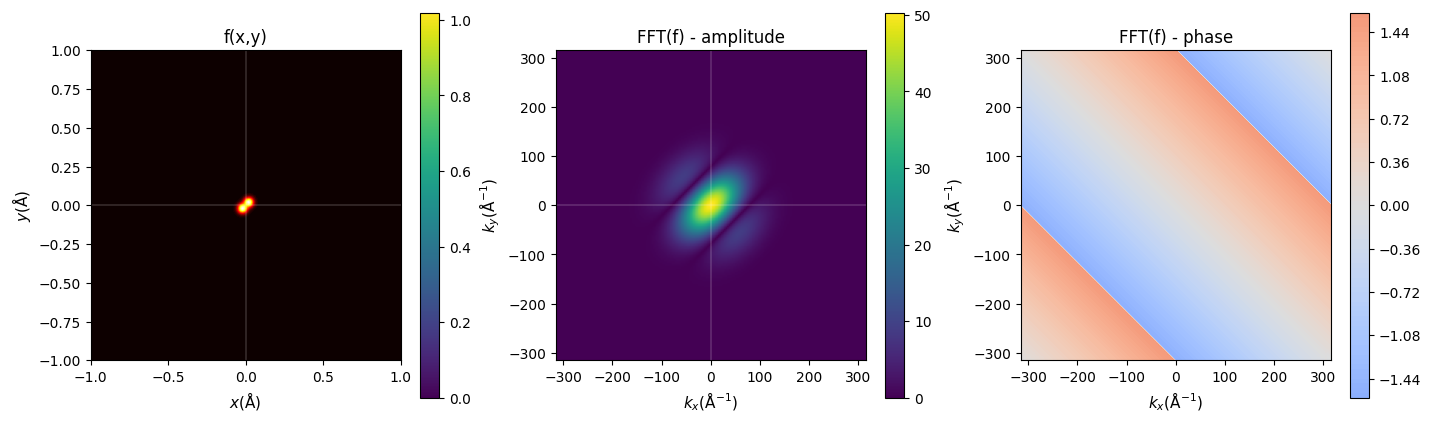

In [100]:
# define a function to be transformed
N = 201
x = np.linspace(-1, 1, N, dtype=np.float64)
y = np.linspace(-1, 1, N, dtype=np.float64)

X, Y = np.meshgrid(x, y)

x0 = 0.02
y0 = 0.02
sigma = 0.02

f = gaussian(X, Y, x0, y0, sigma) + gaussian(X, Y, -x0, -y0, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)